# 01 — Exploratory Data Analysis
Load, clean, and explore the German Credit dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

## 1. Load Data

In [2]:
df = pd.read_csv('../data/german_credit_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.shape

(1000, 10)

In [4]:
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

## 2. Missing Value Analysis

In [5]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [7]:
pd.crosstab(
    df['Saving accounts'],
    df['Risk'],
    normalize='index',
    dropna=False
)

Risk,bad,good
Saving accounts,,
little,0.359867,0.640133
moderate,0.330097,0.669903
quite rich,0.174603,0.825397
rich,0.125000,0.875000
NaN,0.174863,0.825137


In [8]:
df.groupby('Saving accounts', dropna=False)['Credit amount'].mean()

Saving accounts
little        3187.832504
moderate      3384.038835
quite rich    2572.111111
rich          2573.395833
NaN           3906.409836
Name: Credit amount, dtype: float64

In [9]:
df.groupby('Checking account', dropna=False)['Credit amount'].mean()

Checking account
little      3175.218978
moderate    3827.561338
rich        2177.650794
NaN         3133.101523
Name: Credit amount, dtype: float64

In [10]:
pd.crosstab(
    df['Checking account'],
    df['Risk'],
    normalize='index',
    dropna=False
)

Risk,bad,good
Checking account,,
little,0.492701,0.507299
moderate,0.390335,0.609665
rich,0.222222,0.777778
NaN,0.116751,0.883249


## 3. Clean Dataset
Drop rows with missing values (NaN in Saving accounts / Checking account).

In [11]:
df = df.dropna()
df['Job'] = df['Job'].astype('str')
print(df.shape)
df.isnull().sum()

(522, 10)


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [12]:
df['Risk'].value_counts()

Risk
good    291
bad     231
Name: count, dtype: int64

In [13]:
df['Risk'].value_counts(normalize=True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    object
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    object
dtypes: int64(3), object(7)
memory usage: 44.9+ KB


## 4. Univariate Analysis

In [15]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

for col in cat_cols:
    print(f'{col} -> {df[col].unique().tolist()}')

Sex -> ['female', 'male']
Job -> ['2', '3', '1', '0']
Housing -> ['own', 'free', 'rent']
Saving accounts -> ['little', 'moderate', 'quite rich', 'rich']
Checking account -> ['moderate', 'little', 'rich']
Purpose -> ['radio/TV', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others', 'education']
Risk -> ['bad', 'good']


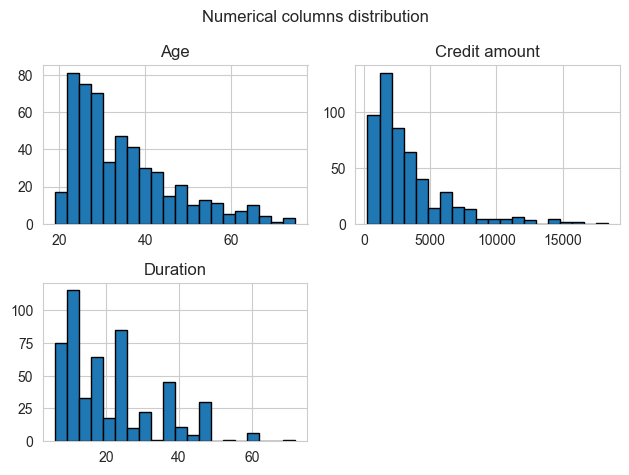

In [16]:
df[num_cols].hist(bins=20, edgecolor='black')
plt.suptitle('Numerical columns distribution')
plt.tight_layout()
plt.show()

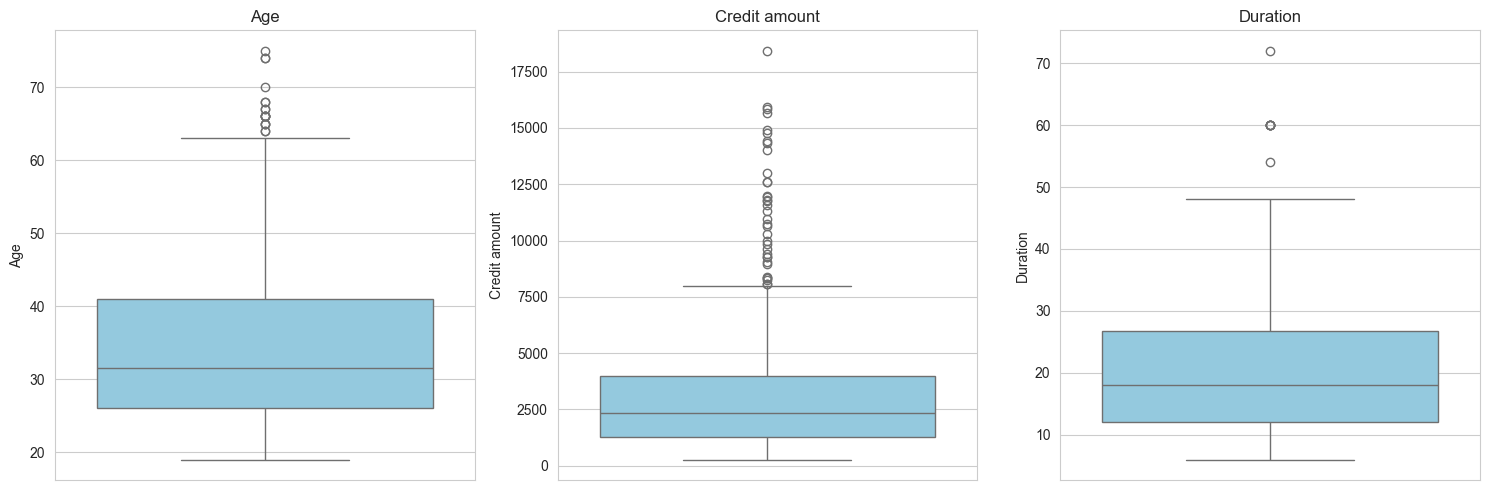

In [17]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

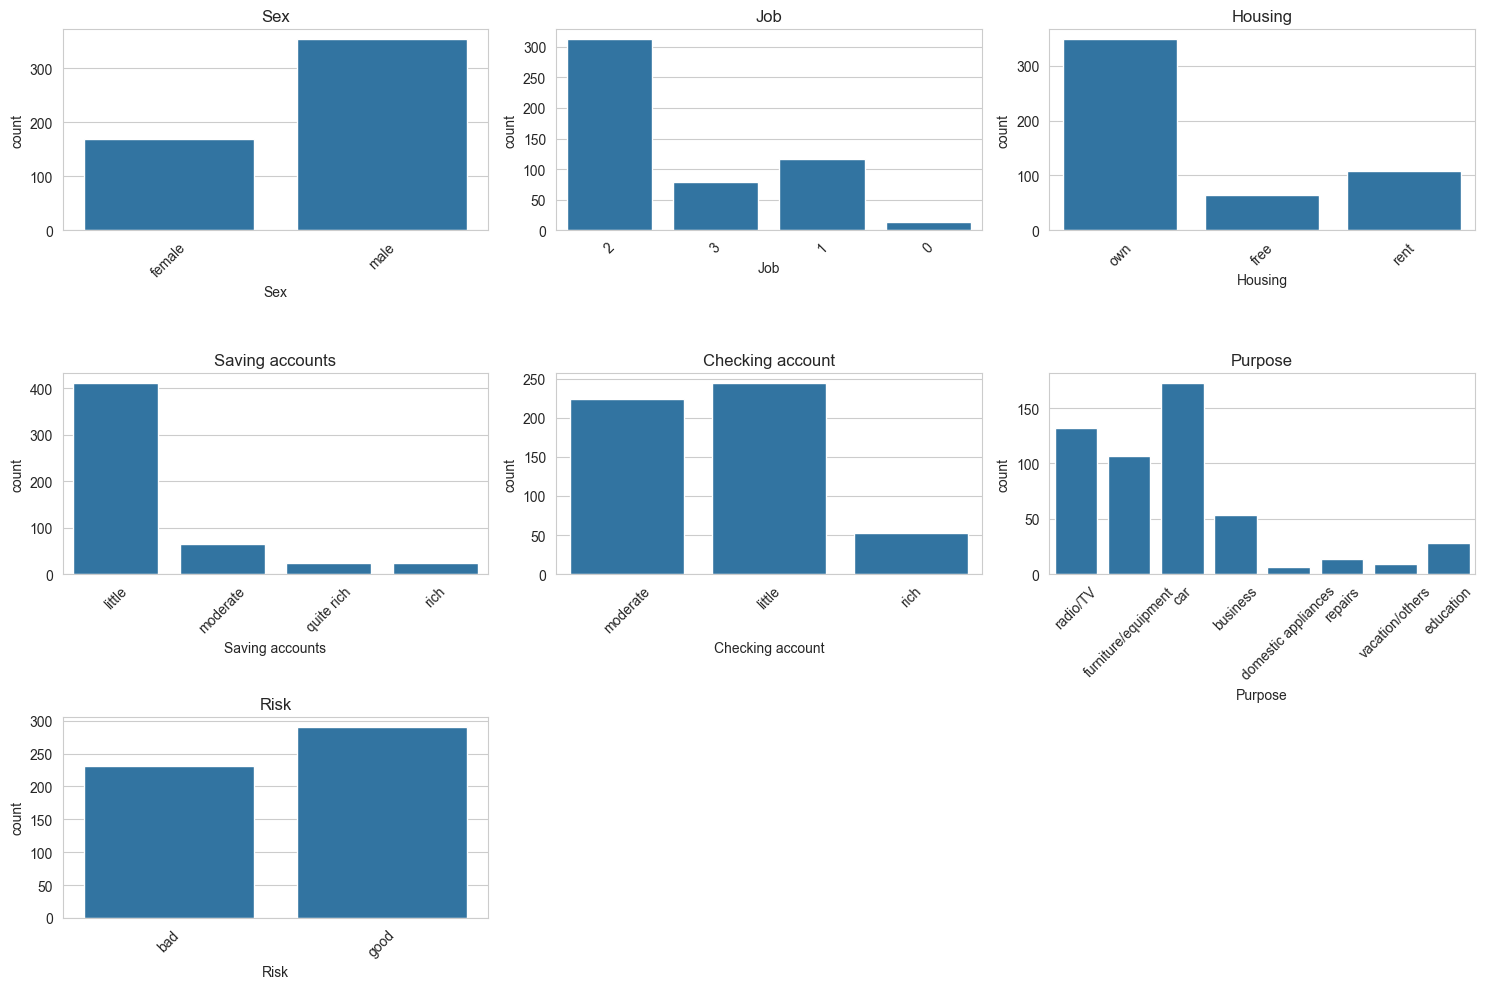

In [18]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 5. Bivariate Analysis

In [19]:
df.query('Duration >= 60').shape

(7, 10)

In [20]:
df[df['Sex'] == 'male']['Risk'].value_counts()

Risk
good    205
bad     149
Name: count, dtype: int64

In [21]:
df.groupby('Housing')['Risk'].value_counts()

Housing  Risk
free     bad      36
         good     29
own      good    210
         bad     139
rent     bad      56
         good     52
Name: count, dtype: int64

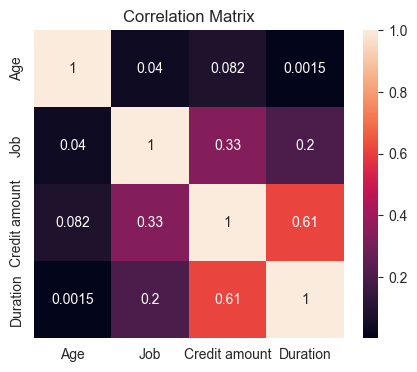

In [22]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].astype(float).corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [23]:
print('Credit amount by Job skill level:')
print(df.groupby('Job')['Credit amount'].mean())
print()
print('Credit amount by Sex:')
print(df.groupby('Sex')['Credit amount'].mean())
print()
print('Credit amount by Housing:')
print(df.groupby('Housing')['Credit amount'].mean())

Credit amount by Job skill level:
Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

Credit amount by Sex:
Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

Credit amount by Housing:
Housing
free    4846.384615
own     3003.504298
rent    3224.694444
Name: Credit amount, dtype: float64


In [24]:
pd.pivot_table(data=df, index='Housing', columns='Purpose', values='Credit amount')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


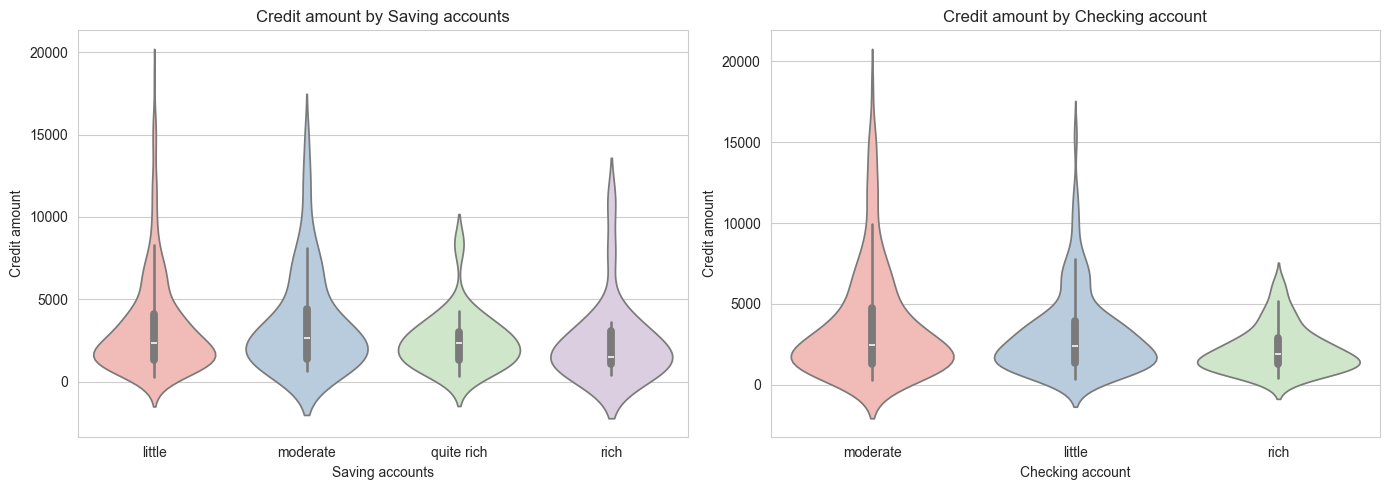

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.violinplot(data=df, x='Saving accounts', y='Credit amount', palette='Pastel1', ax=axes[0])
axes[0].set_title('Credit amount by Saving accounts')
sns.violinplot(data=df, x='Checking account', y='Credit amount', palette='Pastel1', ax=axes[1])
axes[1].set_title('Credit amount by Checking account')
plt.tight_layout()
plt.show()

## 6. Risk Profiling

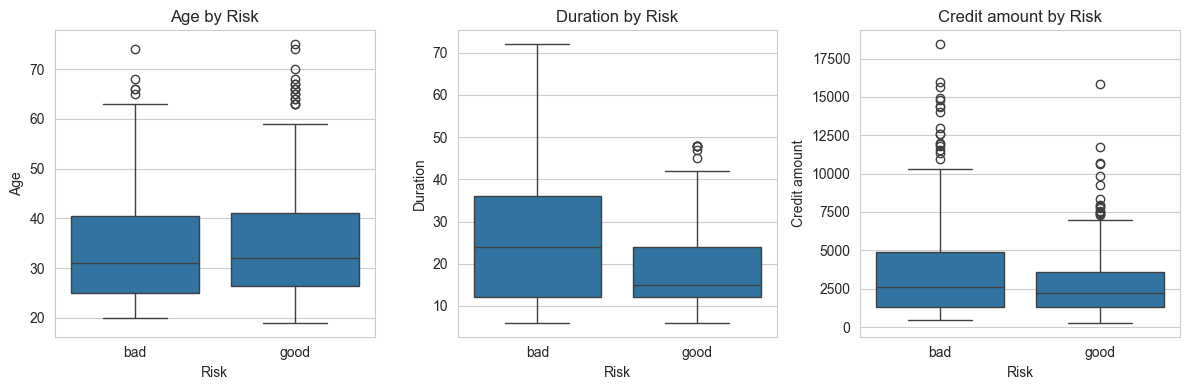

In [26]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Age', 'Duration', 'Credit amount']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(df, x='Risk', y=col)
    plt.title(f'{col} by Risk')
plt.tight_layout()
plt.show()

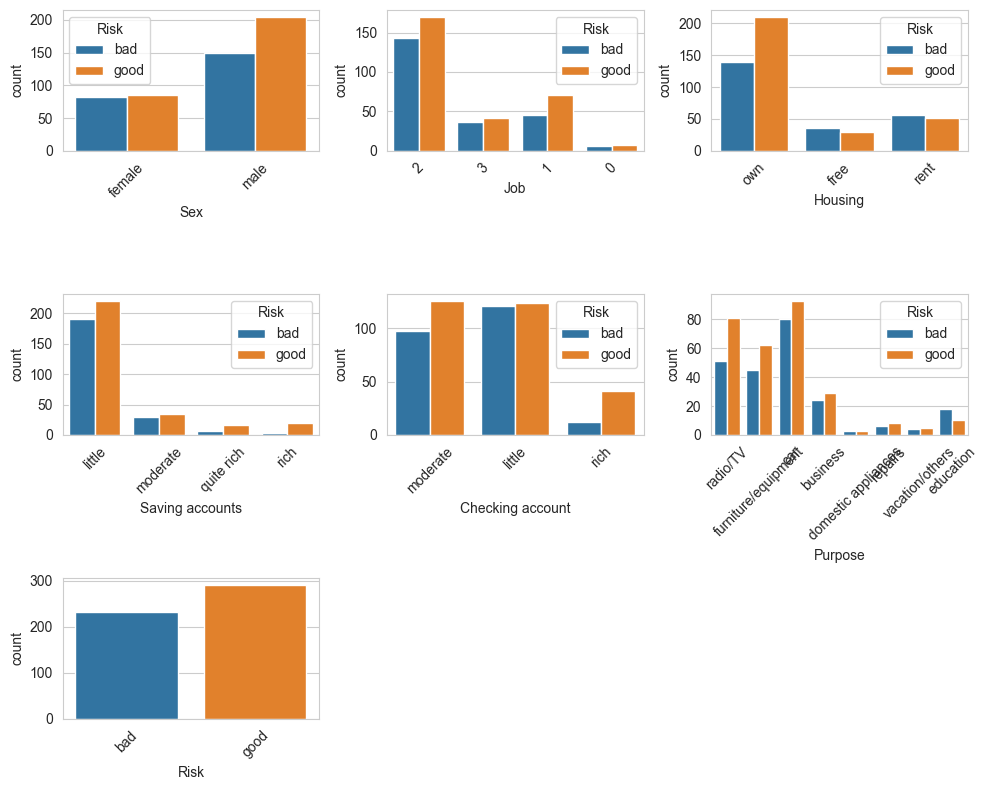

In [29]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(df, x=col, hue='Risk')
    plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()